## Donor Choose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
import sqlite3
import numpy as np
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer

from sklearn.metrics import confusion_matrix, roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec, KeyedVectors

from tqdm import tqdm
import os

from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter
from pathlib2 import Path

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### Reading the Data

In [2]:
path = Path('data')

In [3]:
project_df = pd.read_csv(path/'train_data.csv')
project_df.head()

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   
3           KY        2016-10-06 21:16:17          Grades PreK-2   
4           TX        2016-07-11 01:10:09          Grades PreK-2   

            project_subject_categories     project_subject_subcategories  \
0                  Literacy & Language                     ESL, Literacy   
1    History & Civics, Health & Sports  Civics & Government, Team Sports   
2                      Health & Sports    Health & Wellness, Team Sports   
3  Literacy & Language, Math & Science             Literacy, Mathematics   
4                       Math & Science                       Mathematics   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   
4  For many students, math is a subject that does...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   
4             NaN  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved  
0                                             0                    0  
1                                             7                    1  
2                                             1                    0  
3                                             4                    1  
4                                             1                    1

In [4]:
resource_df = pd.read_csv(path/'resources.csv')
resource_df.head()

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   
2  p069063  Cory Stories: A Kid's Book About Living With Adhd         1   
3  p069063  Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...         2   
4  p069063  EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...         3   

    price  
0  149.00  
1   14.95  
2    8.45  
3   13.59  
4   24.95

In [5]:
print("Number of data points in train data", project_df.shape)
print('='*70)
print("The attributes of data :", project_df.columns.values)

Number of data points in train data (109248, 17)
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [6]:
print("Number of data points in train data", resource_df.shape)
print('='*70)
print("The attributes of data :", resource_df.columns.values)

Number of data points in train data (1541272, 4)
The attributes of data : ['id' 'description' 'quantity' 'price']


## Data Analysis

In [9]:
y_value_counts = project_df['project_is_approved'].value_counts()
data = [y_value_counts[1], y_value_counts[0]]

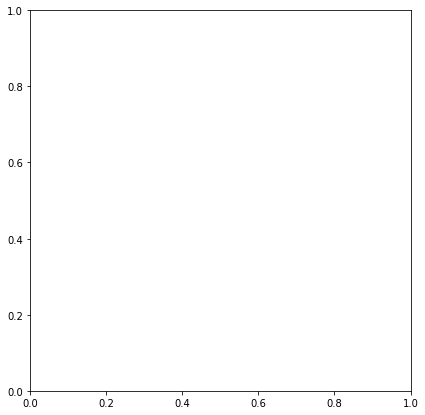

In [11]:
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(aspect="equal"))
recipe = ['accepted', 'not accepted']


In [12]:
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

In [32]:
wedges[0].theta1

-90.0

Number of projects that are approved for funding, 92706, ( 84.86 % )
Number of projects that are not approved for funding, 92706, ( 15.14 % )


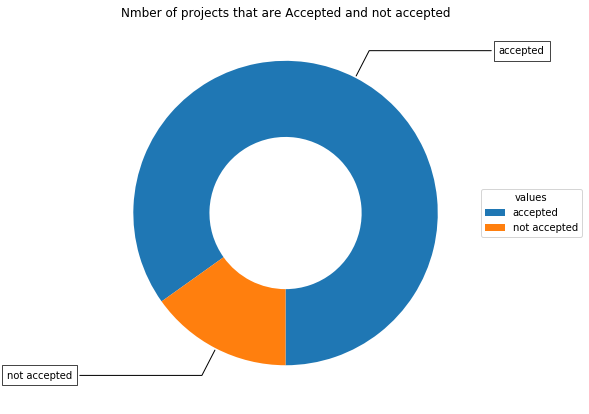

In [26]:
y_value_counts = project_df['project_is_approved'].value_counts()
print(f'Number of projects that are approved for funding, {y_value_counts[1]}, ( {round((y_value_counts[1] / (y_value_counts[1] + y_value_counts[0])) * 100, 2)} % )')
print(f'Number of projects that are not approved for funding, {y_value_counts[1]}, ( {round((y_value_counts[0] / (y_value_counts[1] + y_value_counts[0])) * 100, 2)} % )')
                                                           
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(aspect="equal"))
recipe = ['accepted', 'not accepted']

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=.5), startangle=-90)
bbox_props = dict(boxstyle="square, pad=0.5", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle='-'), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle, angleA=0, angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.4 * np.sign(x), 1.2*y),  horizontalalignment=horizontalalignment, **kw)

ax.legend(wedges, recipe,
          title="values",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("Nmber of projects that are Accepted and not accepted")
plt.show()
                                                           
                                                           

## Univariate Analysis: School State

In [33]:
temp = pd.DataFrame(project_df.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()
temp.columns = ['state_code', 'num_proposals']


# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620

scl = [[0.0, 'rgb(242, 240, 247)'], [0.2, 'rgb(218, 218, 235)'],
       [0.4, 'rgb(188, 189, 220)'], [0.6, 'rgb(158, 154, 220)'],
       [0.4, 'rgb(117, 107, 177)'], [1.0, 'rgb(84, 39, 143)']]

data = [dict(
        type='choropleth',
        colorscale=scl,
        autocolorscale=False,
        locations=temp['state_code'],
        z = temp['num_proposals'].astype(float),
        locationmode = 'USA-states',
        text = temp['state_code'],
        marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2)),
        colorbar = dict(title = "% of pro")
        )]

layout = dict(
            title="Project Proposals % of Acceptance Rate by US States",
            geo = dict(
                scope='usa',
                projection=dict( type='albers usa' ),
                showlakes = True,
                lakecolor = 'rgb(255, 255, 255)'
            )
         )

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='us-map-heat-map')

In [34]:
# https://www.csi.cuny.edu/sites/default/files/pdf/administration/ops/2letterstabbrev.pdf
temp.sort_values(by=['num_proposals'], inplace=True)
print("Top five states with lowest % approvals")
print(temp.head(5))
print('='*50)
print("Top states with highest % approvals")
print(temp.tail(5))

Top five states with lowest % approvals
   state_code  num_proposals
46         VT       0.800000
7          DC       0.802326
43         TX       0.813142
26         MT       0.816327
18         LA       0.831245
Top states with highest % approvals
   state_code  num_proposals
30         NH       0.873563
35         OH       0.875152
47         WA       0.876178
28         ND       0.888112
8          DE       0.897959


In [56]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,10))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('% of projects aproved state wise')
    plt.xticks(ind, list(data[xtick].values), rotation='vertical')
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

In [57]:
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(project_df.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(project_df.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(project_df.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

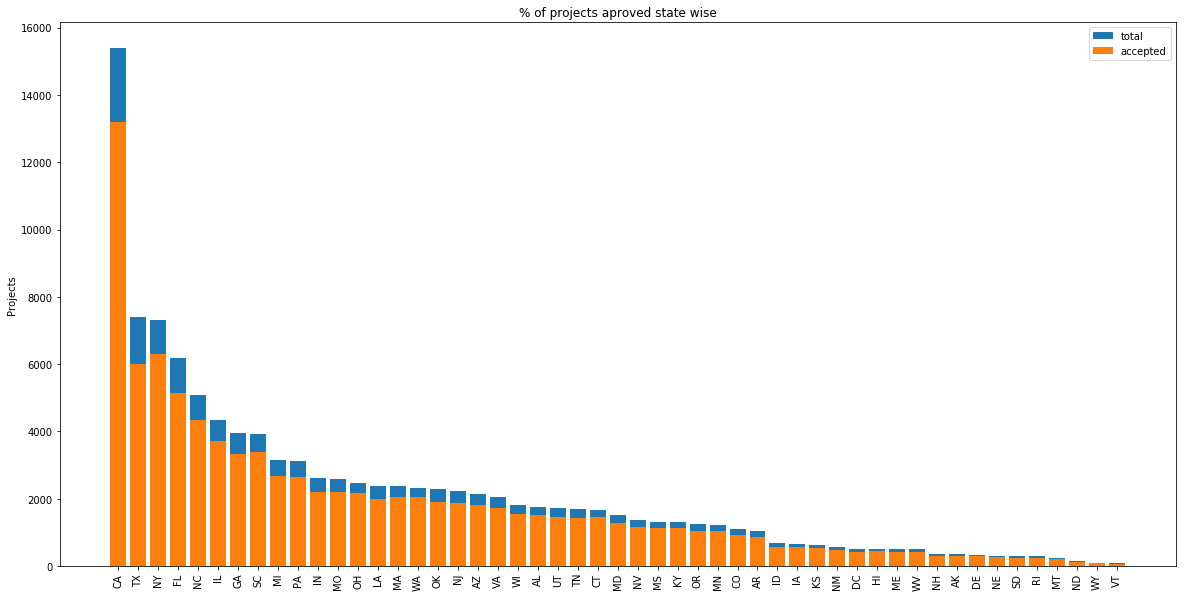

   school_state  project_is_approved  total       Avg
4            CA                13205  15388  0.858136
43           TX                 6014   7396  0.813142
34           NY                 6291   7318  0.859661
9            FL                 5144   6185  0.831690
27           NC                 4353   5091  0.855038
   school_state  project_is_approved  total       Avg
39           RI                  243    285  0.852632
26           MT                  200    245  0.816327
28           ND                  127    143  0.888112
50           WY                   82     98  0.836735
46           VT                   64     80  0.800000


In [58]:
univariate_barplots(project_df, 'school_state', 'project_is_approved', False)

__Every state is having more than 80% success rate in approval__

__CA submits twice as much projects than the 2nd best__

## Univariate Analysis: School State

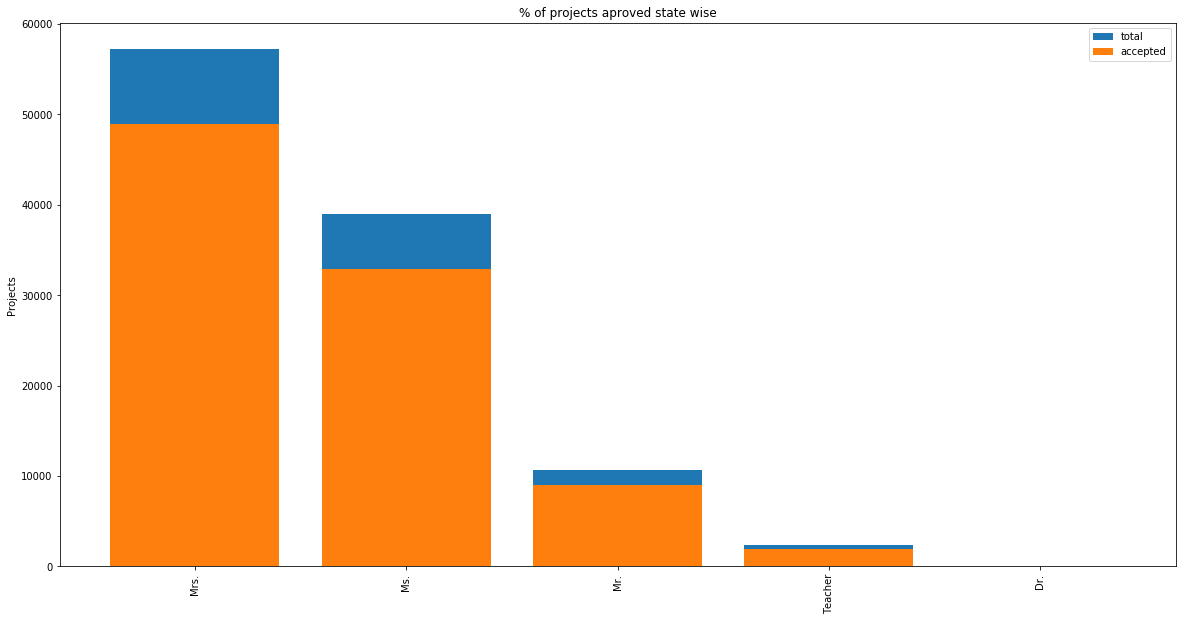

  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308
  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308


In [59]:
univariate_barplots(project_df, 'teacher_prefix', 'project_is_approved' , top=False)

### 1.2.3 Univariate Analysis: project_grade_category

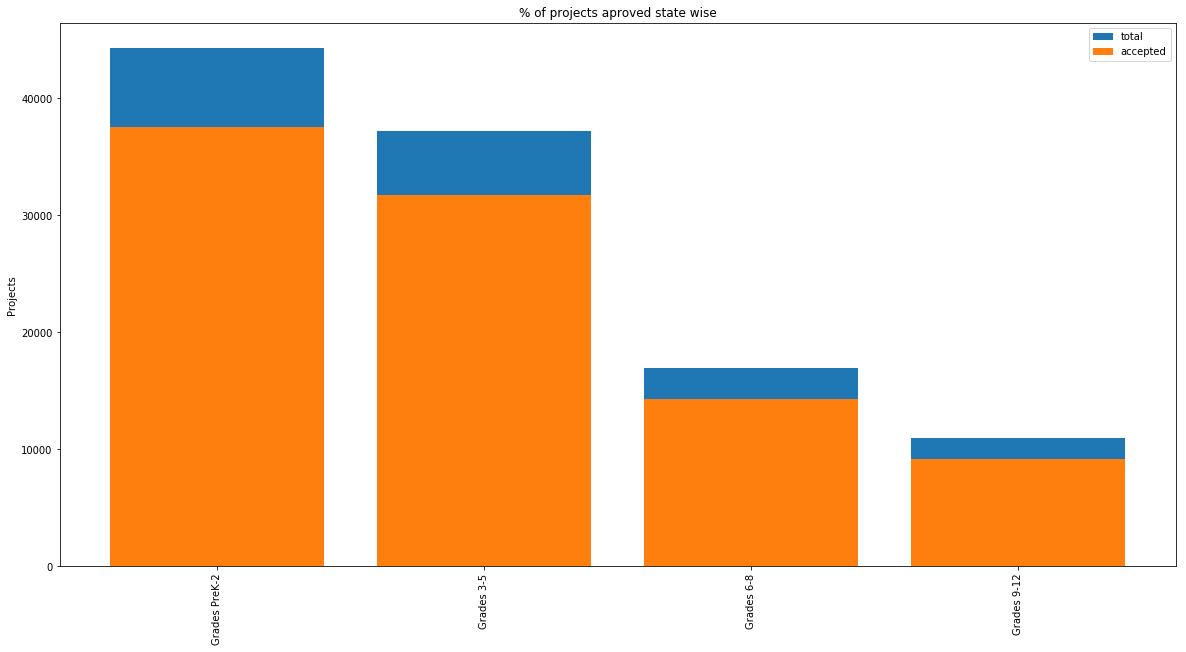

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636


In [60]:
univariate_barplots(project_df, 'project_grade_category', 'project_is_approved' , top=False)

### 1.2.4 Univariate Analysis: project_subject_categories

In [61]:
catogories = list(project_df['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [62]:
project_df['clean_categories'] = cat_list
# project_df.drop(['project_subject_categories'], axis=1, inplace=True)
project_df.sample(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
37578      146905  p025867  ef827db9221f982b0c27e530ac59a405           Mrs.   
34504      114786  p175258  92c1c5e05384b10f743e3f425fa2d387           Mrs.   
68456      164543  p118927  3e75c94649b938e6bb555441f490f33b           Mrs.   
34080      159194  p245782  b6419f1a0d552d724bc47ae160ac35d4           Mrs.   
17087      109332  p226206  3117e94e5f6032b2db8796ac3e5d8c96            Ms.   

      school_state project_submitted_datetime project_grade_category  \
37578           GA        2016-09-27 21:30:26             Grades 3-5   
34504           IN        2016-09-30 21:17:54          Grades PreK-2   
68456           PA        2017-02-27 12:53:15            Grades 9-12   
34080           NY        2016-11-20 15:43:52          Grades PreK-2   
17087           NM        2016-06-27 13:24:23          Grades PreK-2   

                project_subject_categories   project_subject_subcategories  \
37578                  Literacy & Language  Literacy, Literature & Writing   
34504                  Literacy & Language                        Literacy   
68456                     Music & The Arts                     Visual Arts   
34080                       Math & Science                     Mathematics   
17087  Literacy & Language, Math & Science           Literacy, Mathematics   

                              project_title  \
37578  Chromebook for our Google Classroom!   
34504   Bring on the Tablet Fun Experience!   
68456               Supplying the Art Room!   
34080         Help Us Become Mathematicians   
17087         Students and Teacher Supplies   

                                         project_essay_1  \
37578  Being an independent thinker is a huge part of...   
34504  We are a fun loving, kind, generous, hard-work...   
68456  These students are VERY interested in created ...   
34080  My students and I work together in a second gr...   
17087  My students are kids full or energy and curios...   

                                         project_essay_2 project_essay_3  \
37578  Recently, my classroom has started to implemen...             NaN   
34504  Due to limited computer hookups for our wired ...             NaN   
68456  The students are unable to create art all at t...             NaN   
34080  My students need Math Centers to help them ach...             NaN   
17087  Every year our school's budget shrinks more an...             NaN   

      project_essay_4                           project_resource_summary  \
37578             NaN  My students need 1 Chromebook, a hard shell ca...   
34504             NaN  My students need wifi tablets to add to our da...   
68456             NaN  My students need simple supplies for the art r...   
34080             NaN  My students need Math Centers to help them ach...   
17087             NaN  My students need supplies such as magnetic sen...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
37578                                             7                    0   
34504                                             2                    1   
68456                                             2                    1   
34080                                             4                    1   
17087                                            14                    1   

                     clean_categories          clean_subcategories  
37578               Literacy_Language  Literacy Literature_Writing  
34504               Literacy_Language                     Literacy  
68456                      Music_Arts                   VisualArts  
34080                    Math_Science                  Mathematics  
17087  Literacy_Language Math_Science         Literacy Mathematics

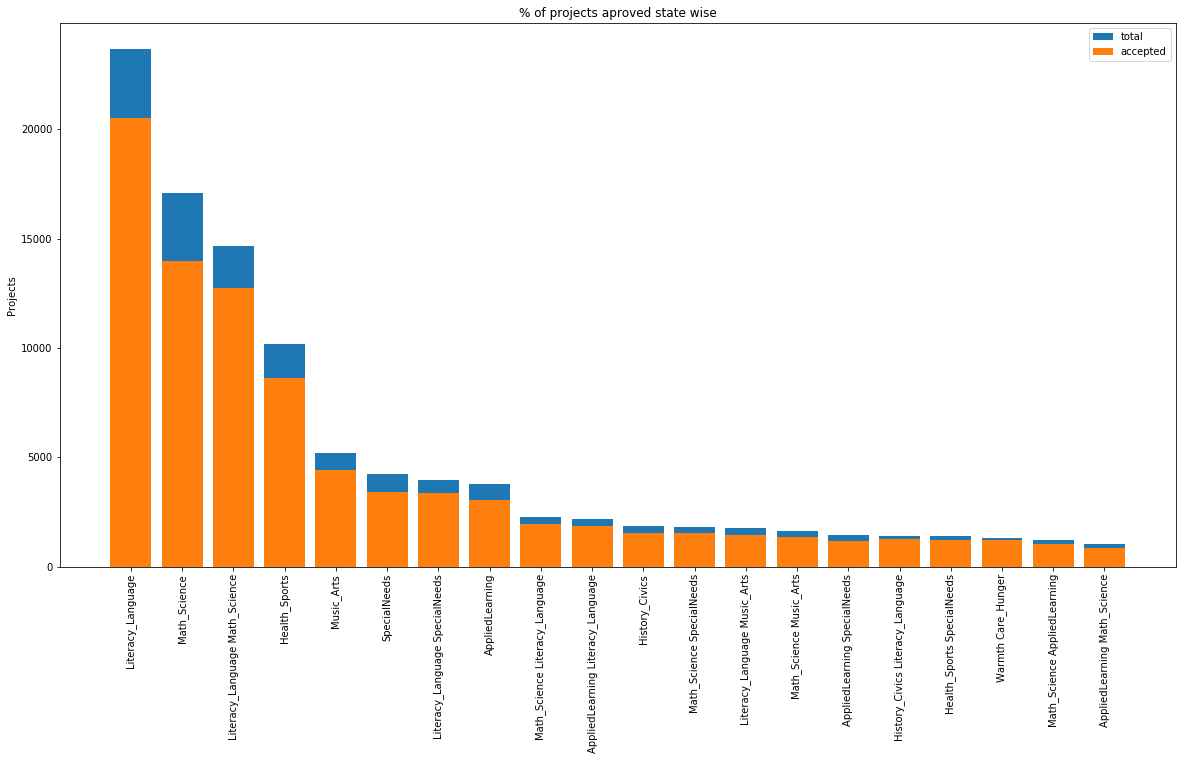

                  clean_categories  project_is_approved  total       Avg
24               Literacy_Language                20520  23655  0.867470
32                    Math_Science                13991  17072  0.819529
28  Literacy_Language Math_Science                12725  14636  0.869432
8                    Health_Sports                 8640  10177  0.848973
40                      Music_Arts                 4429   5180  0.855019
                    clean_categories  project_is_approved  total       Avg
19  History_Civics Literacy_Language                 1271   1421  0.894441
14        Health_Sports SpecialNeeds                 1215   1391  0.873472
50                Warmth Care_Hunger                 1212   1309  0.925898
33      Math_Science AppliedLearning                 1019   1220  0.835246
4       AppliedLearning Math_Science                  855   1052  0.812738


In [63]:
univariate_barplots(project_df, 'clean_categories', 'project_is_approved' , top=20)

In [64]:
from collections import Counter
my_counter = Counter()
for word in project_df['clean_categories'].values:
    my_counter.update(word.split())

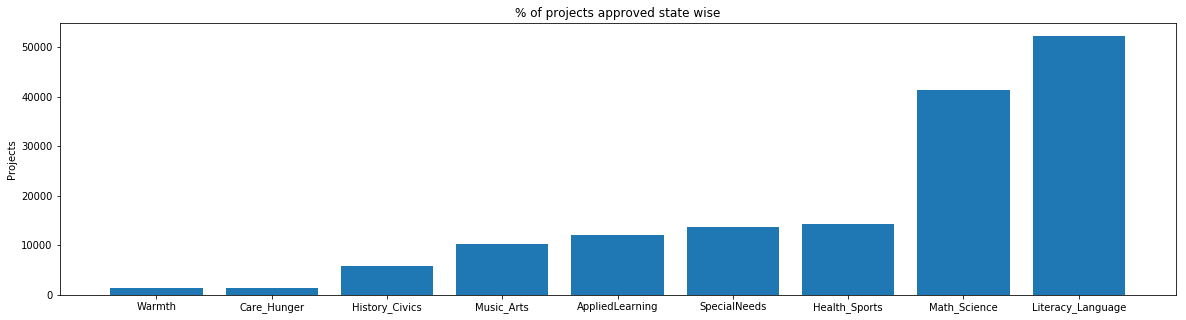

In [65]:
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda x: x[1]))

ind = np.arange(len(sorted_cat_dict))
plt.figure(figsize=(20, 5))
pl = plt.bar(ind, list(sorted_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects approved state wise')
plt.xticks(ind, list(sorted_cat_dict.keys()))
plt.show()

In [66]:
for i, j in sorted_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Warmth               :      1388
Care_Hunger          :      1388
History_Civics       :      5914
Music_Arts           :     10293
AppliedLearning      :     12135
SpecialNeeds         :     13642
Health_Sports        :     14223
Math_Science         :     41421
Literacy_Language    :     52239


### 1.2.5 Univariate Analysis: project_subject_subcategories

In [67]:
sub_catogories = list(project_df['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    sub_cat_list.append(temp.strip())
    
    

In [68]:
project_df['clean_subcategories'] = sub_cat_list
# project_df.drop(['project_subject_categories'], axis=1, inplace=True)
project_df.sample(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
2165        67936  p137180  830d44474a506df63dce028a42d82d11           Mrs.   
54405        5663  p089373  21fb0bd6115a563d7016f8091d03adce            Ms.   
34420       53649  p107895  a8b1810c77fa3bad1251dfba6b7dd398            Ms.   
80919      119591  p013216  105c653359cbb8f984fc41daee70910a            Ms.   
40619      158834  p034762  cb9374b4aed6a746e1ca0d25ab2fab52           Mrs.   

      school_state project_submitted_datetime project_grade_category  \
2165            MI        2016-06-09 16:13:54          Grades PreK-2   
54405           MN        2016-11-22 18:51:53          Grades PreK-2   
34420           IL        2016-06-02 20:20:59             Grades 3-5   
80919           GA        2016-09-01 14:22:33          Grades PreK-2   
40619           TN        2016-11-29 16:56:51             Grades 6-8   

                  project_subject_categories  \
2165                     Literacy & Language   
54405                       Music & The Arts   
34420       Math & Science, Music & The Arts   
80919  Applied Learning, Literacy & Language   
40619  Literacy & Language, History & Civics   

                     project_subject_subcategories  \
2165                Literacy, Literature & Writing   
54405                                  Visual Arts   
34420                           Mathematics, Music   
80919  College & Career Prep, Literature & Writing   
40619        Literature & Writing, Social Sciences   

                                           project_title  \
2165                  Tables and Chairs and Rugs, Oh My!   
54405             A BLUEprint for Learning how to Paint!   
34420  Musical Instruments for Scholars Who Have Neve...   
80919                             Building Good Writers!   
40619                               Mesopotamian Message   

                                         project_essay_1  \
2165   We are a Title 1 school in Wyoming, Michigan. ...   
54405  Being a teacher of a diverse age range, I am r...   
34420  I have the best class in the world, full of bu...   
80919  My students come from a low-income area of Sou...   
40619  I have some of the hardest-working and most ap...   

                                         project_essay_2 project_essay_3  \
2165   I have begun to gather some flexible seating o...             NaN   
54405  As you walk past the art room in my school you...             NaN   
34420  I'll have 29 students, and only one adult, so ...             NaN   
80919  These Reading & Writing Instant Learning Cente...             NaN   
40619  This project will allow my students to create ...             NaN   

      project_essay_4                           project_resource_summary  \
2165              NaN  My students need seating options that empower ...   
54405             NaN  My students need various colors of paint to cr...   
34420             NaN  My students need musical instruments to increa...   
80919             NaN  My students need these writing centers to help...   
40619             NaN  My students need to bring the ancient world to...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
2165                                              0                    1   
54405                                             6                    1   
34420                                            34                    1   
80919                                             1                    0   
40619                                             0                    1   

                        clean_categories  \
2165                   Literacy_Language   
54405                         Music_Arts   
34420            Math_Science Music_Arts   
80919  AppliedLearning Literacy_Language   
40619   Literacy_Language History_Civics   

                         clean_subcategories  
2165             Literacy Literature_Writing  
54405                            

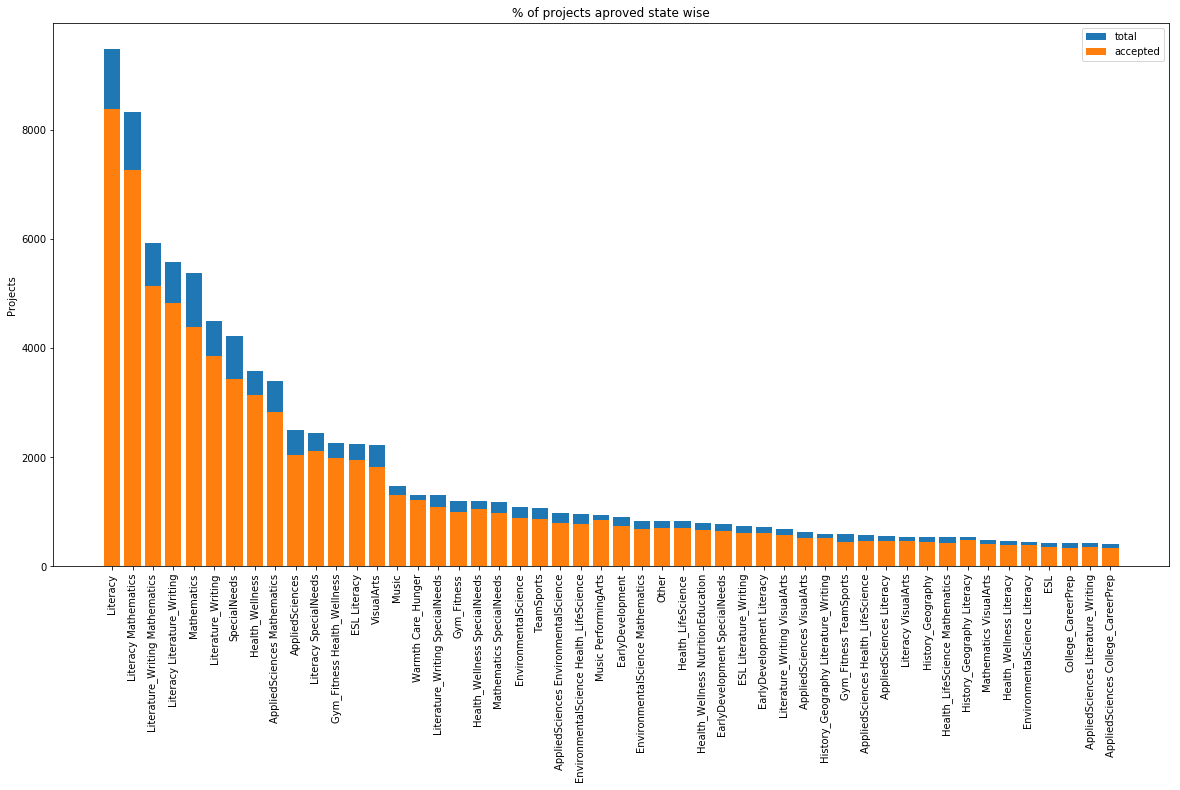

                clean_subcategories  project_is_approved  total       Avg
317                        Literacy                 8371   9486  0.882458
319            Literacy Mathematics                 7260   8325  0.872072
331  Literature_Writing Mathematics                 5140   5923  0.867803
318     Literacy Literature_Writing                 4823   5571  0.865733
342                     Mathematics                 4385   5379  0.815207
                    clean_subcategories  project_is_approved  total       Avg
196       EnvironmentalScience Literacy                  389    444  0.876126
127                                 ESL                  349    421  0.828979
79                   College_CareerPrep                  343    421  0.814727
17   AppliedSciences Literature_Writing                  361    420  0.859524
3    AppliedSciences College_CareerPrep                  330    405  0.814815


In [69]:
univariate_barplots(project_df, 'clean_subcategories', 'project_is_approved' , top=50)

In [70]:
from collections import Counter
my_counter = Counter()
for word in project_df['clean_subcategories'].values:
    my_counter.update(word.split())

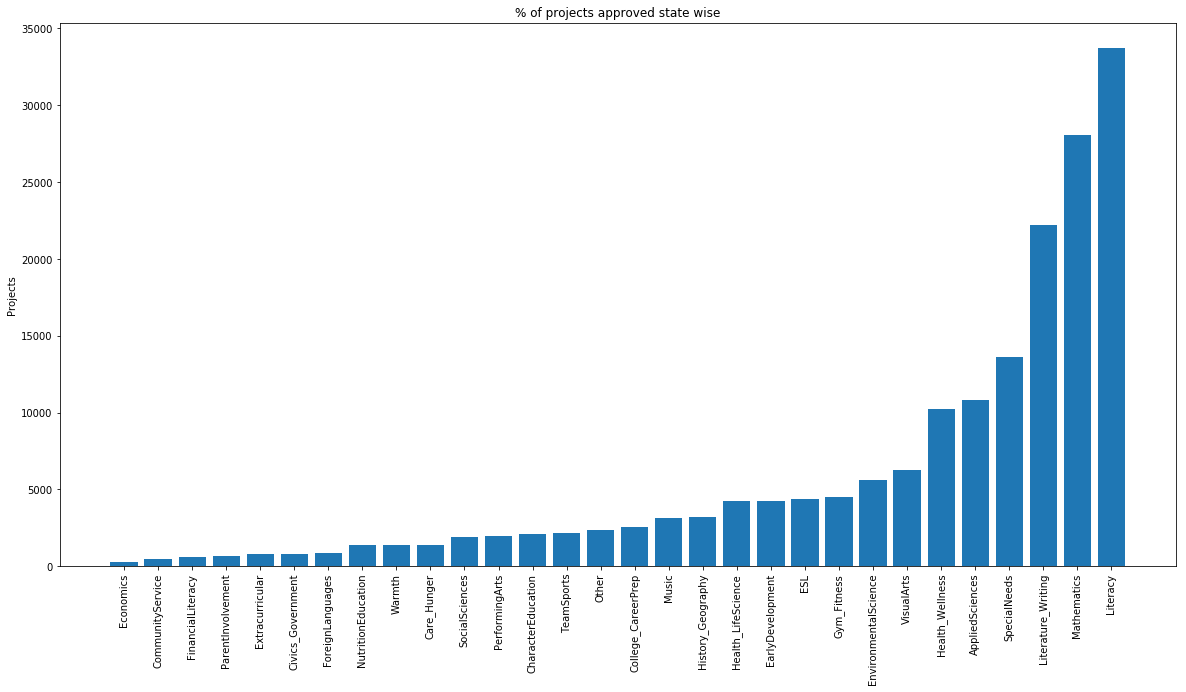

In [71]:
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda x: x[1]))

ind = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20, 10))
pl = plt.bar(ind, list(sorted_sub_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects approved state wise')
plt.xticks(ind, list(sorted_sub_cat_dict.keys()), rotation='vertical')
plt.show()

In [72]:
for i, j in sorted_sub_cat_dict.items():
    print(f"{i:20} :{j:10}")

Economics            :       269
CommunityService     :       441
FinancialLiteracy    :       568
ParentInvolvement    :       677
Extracurricular      :       810
Civics_Government    :       815
ForeignLanguages     :       890
NutritionEducation   :      1355
Warmth               :      1388
Care_Hunger          :      1388
SocialSciences       :      1920
PerformingArts       :      1961
CharacterEducation   :      2065
TeamSports           :      2192
Other                :      2372
College_CareerPrep   :      2568
Music                :      3145
History_Geography    :      3171
Health_LifeScience   :      4235
EarlyDevelopment     :      4254
ESL                  :      4367
Gym_Fitness          :      4509
EnvironmentalScience :      5591
VisualArts           :      6278
Health_Wellness      :     10234
AppliedSciences      :     10816
SpecialNeeds         :     13642
Literature_Writing   :     22179
Mathematics          :     28074
Literacy             :     33700


### 1.2.6 Univariate Analysis: Text features (Title)

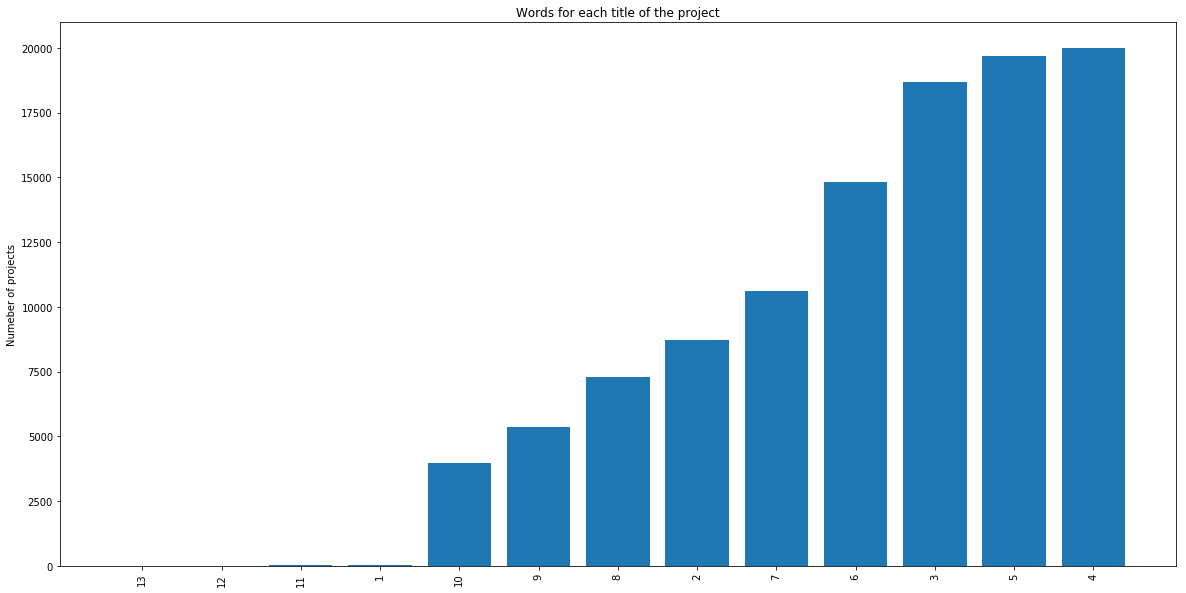

In [73]:
word_count = project_df['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda x: x[1]))

ind = np.arange(len(word_dict))
plt.figure(figsize=(20, 10))
pl = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Numeber of projects')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()), rotation='vertical')
plt.show()

In [74]:
approved_word_count = project_df[project_df['project_is_approved'] == 1]['project_title'].str.split().apply(len).values

rejected_word_count = project_df[project_df['project_is_approved'] == 0]['project_title'].str.split().apply(len).values



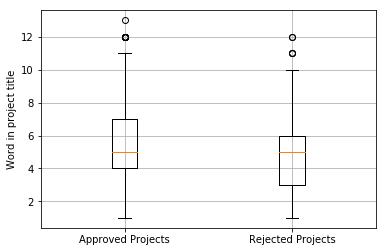

In [75]:
plt.boxplot([approved_word_count, rejected_word_count])
plt.xticks([1, 2], ('Approved Projects', 'Rejected Projects'))
plt.ylabel('Word in project title')
plt.grid()
plt.show()

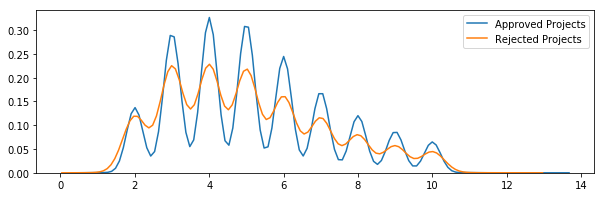

In [76]:
plt.figure(figsize=(10, 3))
sns.distplot(approved_word_count, hist=False, label='Approved Projects')
sns.distplot(rejected_word_count, hist=False, label='Rejected Projects')
plt.legend()
plt.show()


### 1.2.7 Univariate Analysis: Text features (Project Essay's)

In [78]:
project_df["essay"] = project_df["project_essay_1"].map(str) +\
                        project_df["project_essay_2"].map(str) + \
                        project_df["project_essay_3"].map(str) + \
                        project_df["project_essay_4"].map(str)

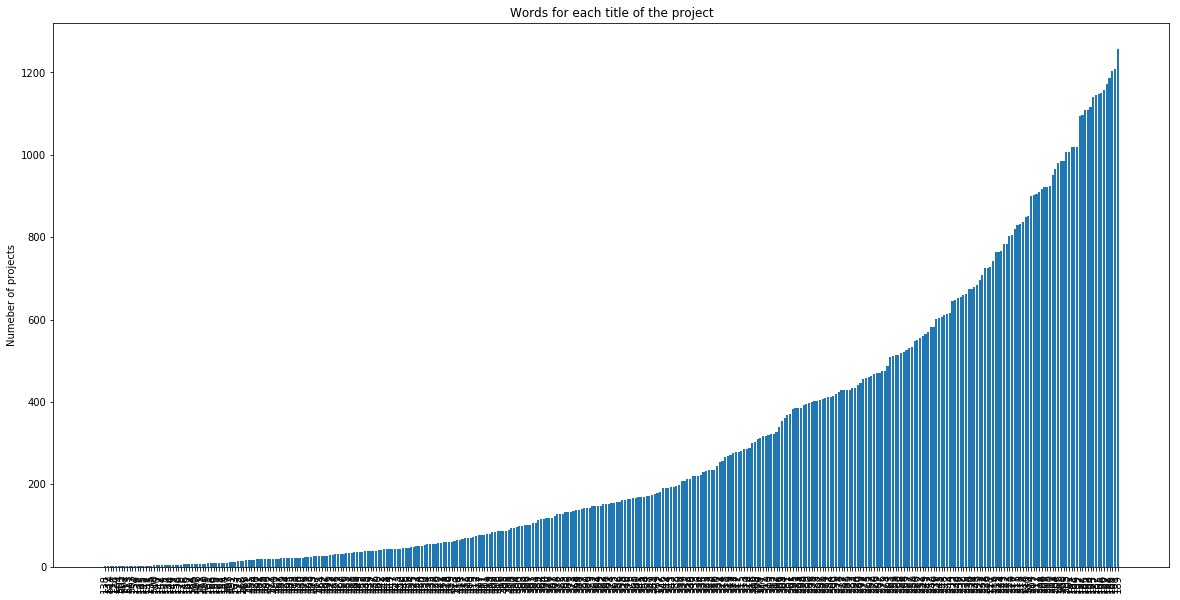

<Figure size 432x288 with 0 Axes>

In [80]:
word_count = project_df['essay'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda x: x[1]))

ind = np.arange(len(word_dict))
plt.figure(figsize=(20, 10))
pl = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Numeber of projects')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()), rotation='vertical')
plt.show()
plt.tight_layout()

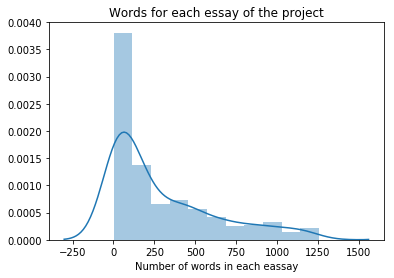

In [81]:
sns.distplot(word_count.values)
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.show()

In [82]:
approved_word_count = project_df[project_df['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_df[project_df['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

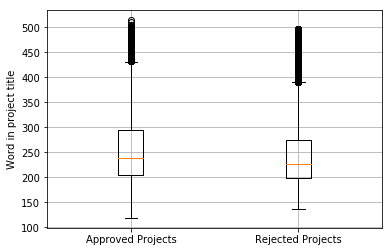

In [83]:
plt.boxplot([approved_word_count, rejected_word_count])
plt.xticks([1, 2], ('Approved Projects', 'Rejected Projects'))
plt.ylabel('Word in project title')
plt.grid()
plt.show()

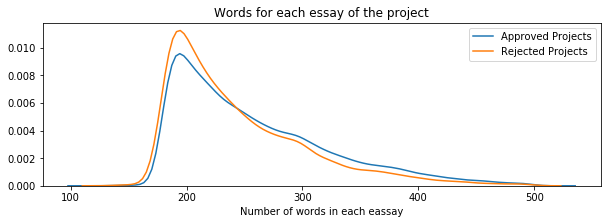

In [84]:
plt.figure(figsize=(10, 3))
sns.distplot(approved_word_count, hist=False, label='Approved Projects')
sns.distplot(rejected_word_count, hist=False, label='Rejected Projects')
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

### 1.2.8 Univariate Analysis: Cost per project

In [85]:
# we get the cost of the project using resource.csv file
resource_df.head()

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   
2  p069063  Cory Stories: A Kid's Book About Living With Adhd         1   
3  p069063  Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...         2   
4  p069063  EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...         3   

    price  
0  149.00  
1   14.95  
2    8.45  
3   13.59  
4   24.95

In [86]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_df.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head()

id    price  quantity
0  p000001   459.56         7
1  p000002   515.89        21
2  p000003   298.97         4
3  p000004  1113.69        98
4  p000005   485.99         8

In [87]:
project_data = pd.merge(project_df, price_data, on='id', how='left')

In [88]:
approved_price = project_data[project_data['project_is_approved']==1]['price'].values

rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

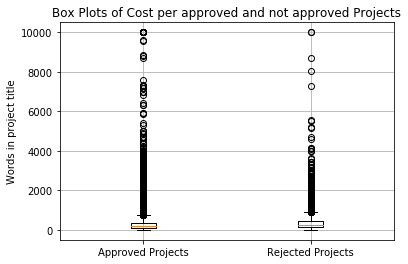

In [89]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_price, rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

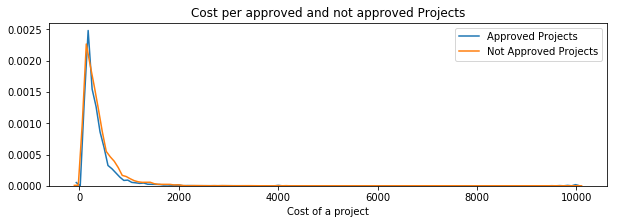

In [90]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

In [91]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ['Percentile', 'Approved Projects', 'Not Approved Projects']

for i in range(0, 101, 5):
    x.add_row([i, np.round(np.percentile(approved_price, i), 3), np.round(np.percentile(rejected_price, i), 3)])
    
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.66       |          1.97         |
|     5      |       13.59       |          41.9         |
|     10     |       33.88       |         73.67         |
|     15     |        58.0       |         99.109        |
|     20     |       77.38       |         118.56        |
|     25     |       99.95       |        140.892        |
|     30     |       116.68      |         162.23        |
|     35     |      137.232      |        184.014        |
|     40     |       157.0       |        208.632        |
|     45     |      178.265      |        235.106        |
|     50     |       198.99      |        263.145        |
|     55     |       223.99      |         292.61        |
|     60     |       255.63      |        325.144        |
|     65     |      285.412      |         362.39       

### Univariate Analysis: teacher_number_of_previously_posted_projects

In [92]:
project_df.head()

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   
3           KY        2016-10-06 21:16:17          Grades PreK-2   
4           TX        2016-07-11 01:10:09          Grades PreK-2   

            project_subject_categories     project_subject_subcategories  \
0                  Literacy & Language                     ESL, Literacy   
1    History & Civics, Health & Sports  Civics & Government, Team Sports   
2                      Health & Sports    Health & Wellness, Team Sports   
3  Literacy & Language, Math & Science             Literacy, Mathematics   
4                       Math & Science                       Mathematics   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   
4  For many students, math is a subject that does...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   
4             NaN  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   
2                                             1                    0   
3                                             4                    1   
4                                             1                    1   

                 clean_categories           clean_subcategories  \
0               Literacy_Language                  ESL Literacy   
1    History_Civics Health_Sports  Civics_Government TeamSports   
2                   Health_Sports    Health_Wellness TeamSports   
3  Literacy_Language Math_Science          Literacy Mathematics   
4                    Math_Science                   Mathematics   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...  
2  \r\n\"True champions aren't always the ones th...  
3  I work at a unique school filled with both ESL...  
4  Our second grade classroom next 

In [93]:
project_df[project_df.teacher_id == '487448f5226005d08d36bdd75f095b31']

Unnamed: 0       id                        teacher_id teacher_prefix  \
8          112489  p045029  487448f5226005d08d36bdd75f095b31           Mrs.   
19242       86832  p178338  487448f5226005d08d36bdd75f095b31           Mrs.   
43470       48868  p223726  487448f5226005d08d36bdd75f095b31           Mrs.   
46447       11226  p094421  487448f5226005d08d36bdd75f095b31           Mrs.   
51148      107697  p180849  487448f5226005d08d36bdd75f095b31           Mrs.   
75067       35838  p119357  487448f5226005d08d36bdd75f095b31           Mrs.   
90272       59634  p204204  487448f5226005d08d36bdd75f095b31           Mrs.   

      school_state project_submitted_datetime project_grade_category  \
8               SC        2016-09-25 17:00:26          Grades PreK-2   
19242           SC        2016-12-07 20:44:47          Grades PreK-2   
43470           SC        2016-12-20 10:09:23          Grades PreK-2   
46447           SC        2016-11-05 18:22:45          Grades PreK-2   
51148           SC        2016-08-21 02:48:57          Grades PreK-2   
75067           SC        2016-06-16 13:21:31          Grades PreK-2   
90272           SC        2016-06-27 22:28:29          Grades PreK-2   

                  project_subject_categories  \
8                            Health & Sports   
19242                    Literacy & Language   
43470    Literacy & Language, Math & Science   
46447    Literacy & Language, Math & Science   
51148                        Health & Sports   
75067       Math & Science, History & Civics   
90272  Literacy & Language, Music & The Arts   

                    project_subject_subcategories  \
8                               Health & Wellness   
19242              Literacy, Literature & Writing   
43470                       Literacy, Mathematics   
46447                       Literacy, Mathematics   
51148              Health & Wellness, Team Sports   
75067  Health & Life Science, History & Geography   
90272           Literature & Writing, Visual Arts   

                             project_title  \
8          Targeting More Success in Class   
19242         One Chromebook and 18 Smiles   
43470           Captivated By A Chromebook   
46447     Cruising Lessons ChromeStyle, #3   
51148  Staying Active During Indoor Recess   
75067         Could You Give Us Some TIME?   
90272    Got a New Year? Got New Supplies?   

                                         project_essay_1  \
8      My students are enthusiastic and inquisitive l...   
19242  My second graders are enthusiastic and inquisi...   
43470  My second graders are enthusiastic and inquisi...   
46447  Students are enthusiastic and inquisitive lear...   
51148  Hard-working teachers and staff members in our...   
75067  Our Title I teachers and staff members work ha...   
90272  Our Title I school serves K-6 grades. Teachers...   

                                         project_essay_2 project_essay_3  \
8      My second graders need extra activity time dur...             NaN   
19242  Getting an additional Chromebook in our second...             NaN   
43470  Getting an additional Chromebook in our second...             NaN   
46447  My twenty second graders enjoy using our Chrom...             NaN   
51148  My students' ideas are often the greatest idea...             NaN   
75067  I know donations to this project will enhance ...             NaN   
90272  These requested supplies will be wonderful res...             NaN   

      project_essay_4                           project_resource_summary  \
8                 NaN  My students need three devices and three manag...   
19242             NaN  My students need one Chromebook and one consol...   
43470             NaN  My students need one Chromebook and a console ...   
46447             NaN  My students need one Chromebook and one consol...   
51148             NaN  My students need Magna-Tiles, Legos, Interlox,...   
75067             NaN  My students need a class set of subscriptions ...

In [94]:
tmp = project_df[['teacher_id', 'teacher_number_of_previously_posted_projects', 'project_is_approved']]

In [95]:
tmp[tmp.teacher_id == '487448f5226005d08d36bdd75f095b31']

teacher_id  \
8      487448f5226005d08d36bdd75f095b31   
19242  487448f5226005d08d36bdd75f095b31   
43470  487448f5226005d08d36bdd75f095b31   
46447  487448f5226005d08d36bdd75f095b31   
51148  487448f5226005d08d36bdd75f095b31   
75067  487448f5226005d08d36bdd75f095b31   
90272  487448f5226005d08d36bdd75f095b31   

       teacher_number_of_previously_posted_projects  project_is_approved  
8                                                28                    1  
19242                                            37                    1  
43470                                            38                    1  
46447                                            33                    1  
51148                                            27                    0  
75067                                            22                    1  
90272                                            24                    0

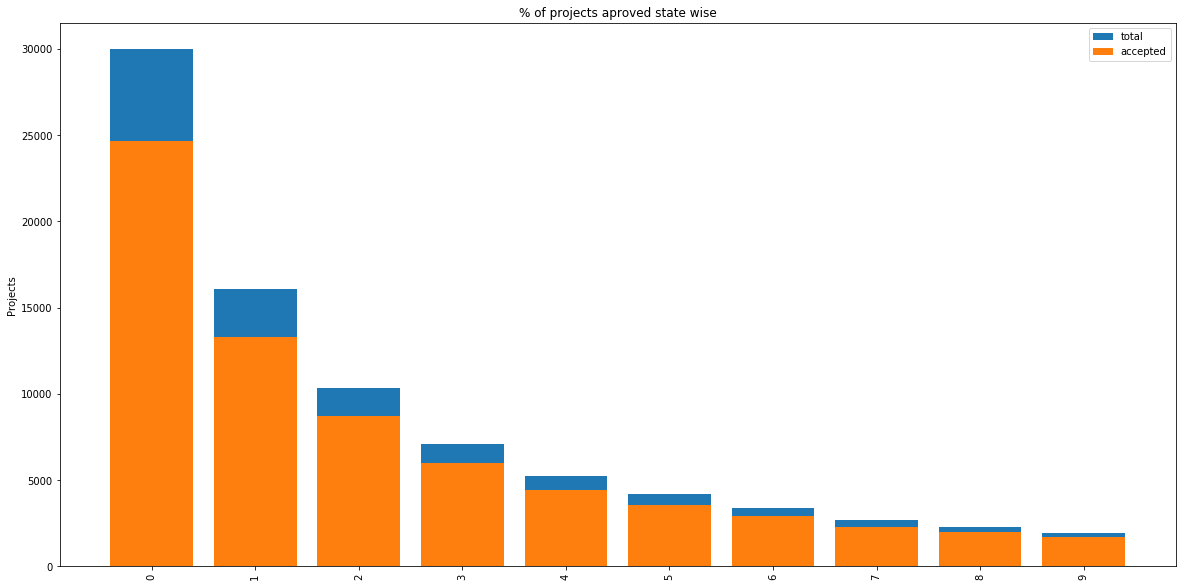

   teacher_number_of_previously_posted_projects  project_is_approved  total  \
0                                             0                24652  30014   
1                                             1                13329  16058   
2                                             2                 8705  10350   
3                                             3                 5997   7110   
4                                             4                 4452   5266   

        Avg  
0  0.821350  
1  0.830054  
2  0.841063  
3  0.843460  
4  0.845423  
   teacher_number_of_previously_posted_projects  project_is_approved  total  \
5                                             5                 3536   4171   
6                                             6                 2911   3404   
7                                             7                 2298   2691   
8                                             8                 1977   2293   
9                                             

In [96]:
univariate_barplots(project_data, 'teacher_number_of_previously_posted_projects', 'project_is_approved', top=10)

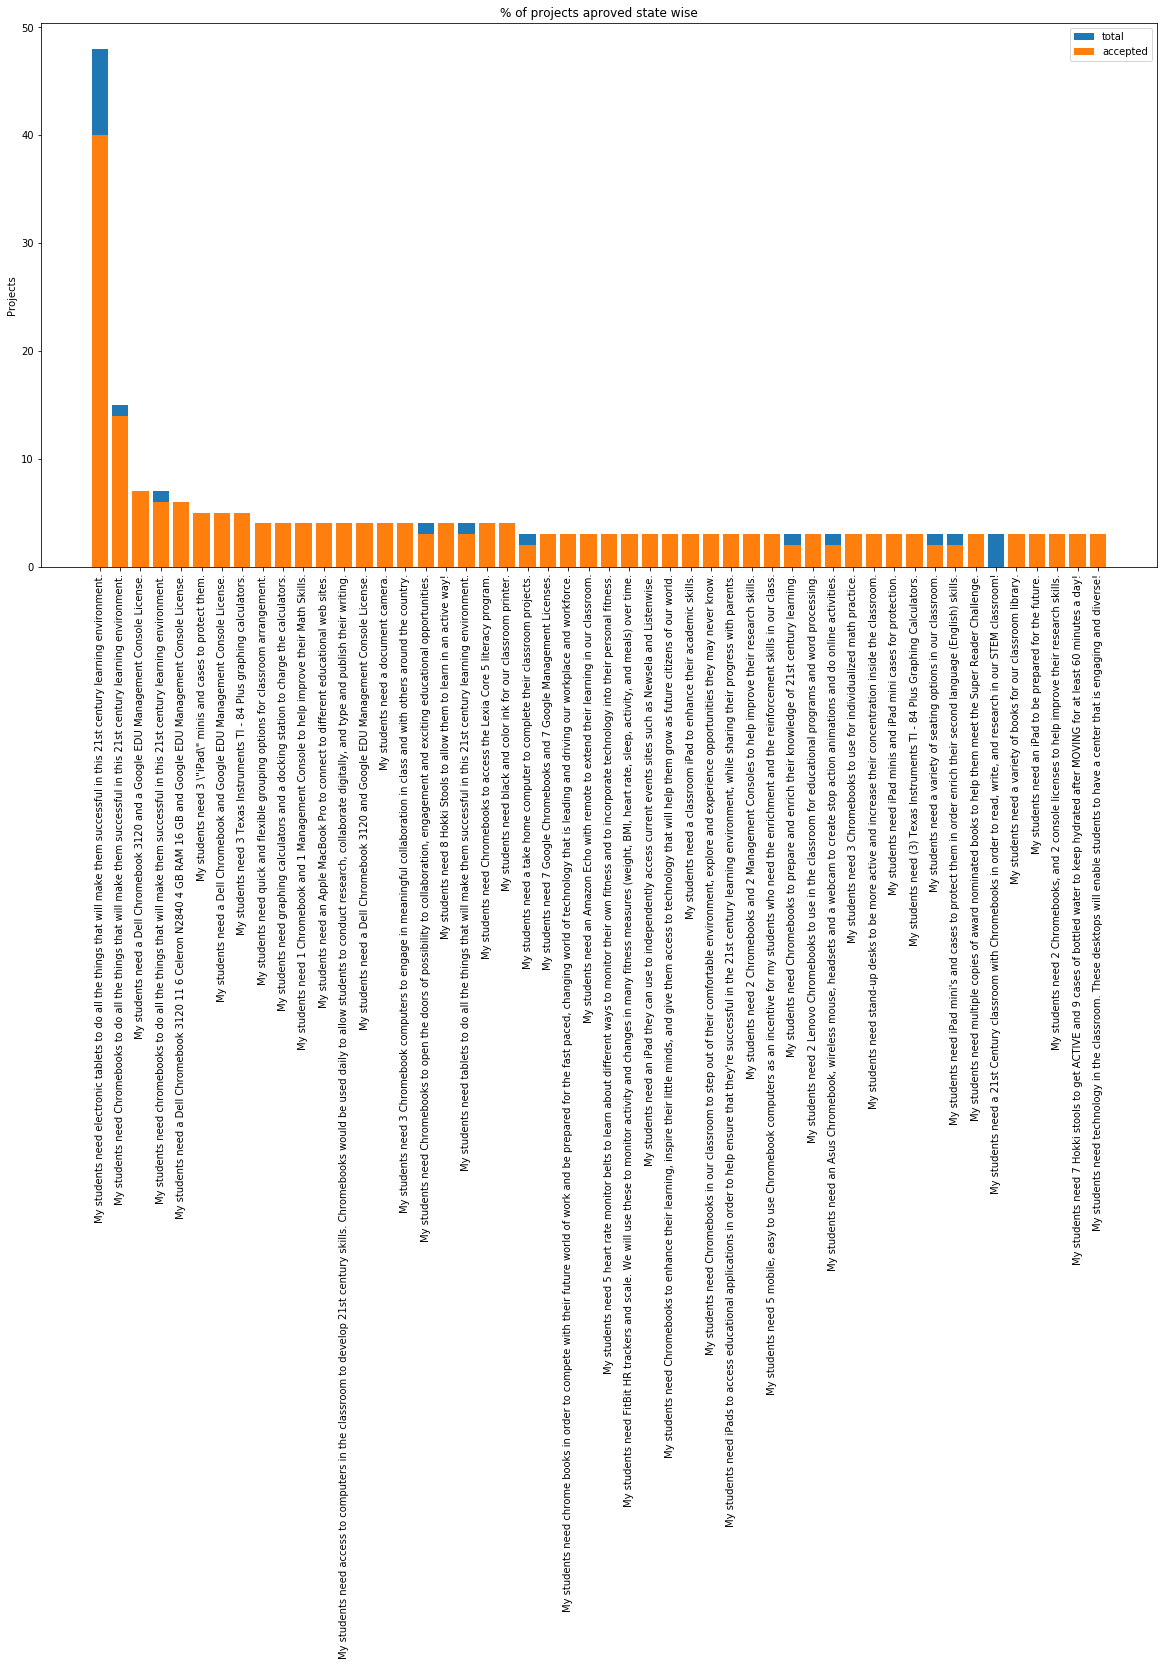

                                project_resource_summary  project_is_approved  \
56539  My students need electronic tablets to do all ...                   40   
10193  My students need Chromebooks to do all the thi...                   14   
18828  My students need a Dell Chromebook 3120 and a ...                    7   
51417  My students need chromebooks to do all the thi...                    6   
18819  My students need a Dell Chromebook 3120 11 6 C...                    6   

       total       Avg  
56539     48  0.833333  
10193     15  0.933333  
18828      7  1.000000  
51417      7  0.857143  
18819      6  1.000000  
                                project_resource_summary  project_is_approved  \
34033  My students need a variety of books for our cl...                    3   
42108  My students need an iPad to be prepared for th...                    3   
1705   My students need 2 Chromebooks, and 2 console ...                    3   
7837   My students need 7 Hokki stools 

In [97]:
univariate_barplots(project_df, 'project_resource_summary', 'project_is_approved' , top=50)